In [124]:
#Predicting whether the Deoartment of Sanitation in New York City will take action or not take action regarding snow complaints.
#The data used was NYC 311 complaints data filtered to only include snow complaints from 2010 -2018 
#Intially the dataset included 80,000+ rows. After filtering rows with missing data this number was reduced to 
#approximately 54,000. Giving the time sensitive nature of snow actually remaining on the ground records witha response time of 
#greater than 17 days were removed. Since it is almost a certainty that no action would/could be taken regarding the original
#complaint.The columns Agency Name,Borough,Closed Date,Created Date, Cross Street 1, Cross Street 2, Descriptor, 
#Location Type, Resolution, Action Updated Date, Resolution Description,Status, Street Name, and Unique Key were removed. 
#Cross Street 2 was removed due the perfect correlation with Cross Street 1. Street Name was removed due to its lack of 
#importance in this calculation. Research done while conducting the data indicated that the Borough and the Community Board 
#represented a greater significance to the action taken. Also keeping the street name would require 
#further data processing and transformation with minimal gained benefit. To create the model of action (not) taken 6 columns
#were used: Borough, Days Needed to Resolve Complaint, Community Board, Descriptor, Action Taken, Open Data Channel Type.


In [125]:
#Python libraries tested or used
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import cross_val_score


In [126]:
#311 snow complaint record
data = pd.read_csv('snow_311.csv')

In [127]:
print(data.columns)

Index(['Borough', 'Days Needed to Resolve Complaint', 'Community Board',
       'Descriptor', 'Action Taken', 'Open Data Channel Type'],
      dtype='object')


In [128]:
print(data.shape)

(51477, 6)


In [129]:
print(data.describe())

       Days Needed to Resolve Complaint
count                      51477.000000
mean                           4.108514
std                            4.280653
min                            0.000000
25%                            1.000000
50%                            3.000000
75%                            6.000000
max                           17.000000


In [130]:
#Drop performed to ensure no rows were kept with missing data
data.dropna()

,Borough,Days Needed to Resolve Complaint,Community Board,Descriptor,Action Taken,Open Data Channel Type
0,BRONX,1,02 BRONX,15S Re-Plow/Spread/Ice-Snow Cond.,No Action Taken,ONLINE
1,BROOKLYN,0,05 BROOKLYN,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
2,BROOKLYN,1,15 BROOKLYN,15S Re-Plow/Spread/Ice-Snow Cond.,No Action Taken,ONLINE
3,QUEENS,0,01 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
4,QUEENS,0,05 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
5,QUEENS,0,11 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
6,QUEENS,0,13 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
7,STATEN ISLAND,0,02 STATEN ISLAND,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
8,BRONX,1,06 BRONX,E9 Snow / Icy Sidewalk,No Action Taken,ONLINE
9,BRONX,2,10 BRONX,E9 Snow / Icy Sidewalk,No Action Taken,ONLINE


In [131]:
data.dtypes
cat_columns = data.columns
cat_columns

Index(['Borough', 'Days Needed to Resolve Complaint', 'Community Board',
       'Descriptor', 'Action Taken', 'Open Data Channel Type'],
      dtype='object')

In [132]:
data['Borough'] = data['Borough'].astype('category')
data['Community Board'] = data['Community Board'].astype('category')
data['Descriptor'] = data['Descriptor'].astype('category')
data['Open Data Channel Type'] = data['Open Data Channel Type'].astype('category')
data['Action Taken'] = data['Action Taken'].astype('category')
data['Days Needed to Resolve Complaint'] = data['Days Needed to Resolve Complaint'].astype('category')
data.dtypes


Borough                             category
Days Needed to Resolve Complaint    category
Community Board                     category
Descriptor                          category
Action Taken                        category
Open Data Channel Type              category
dtype: object

In [133]:
#data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
for name in cat_columns:
    data[name] = data[name].astype('category')
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [134]:
data.dtypes

Borough                             int8
Days Needed to Resolve Complaint    int8
Community Board                     int8
Descriptor                          int8
Action Taken                        int8
Open Data Channel Type              int8
dtype: object

In [135]:
#311 data after transformation 
data

,Borough,Days Needed to Resolve Complaint,Community Board,Descriptor,Action Taken,Open Data Channel Type
0,0,1,5,1,1,1
1,1,0,20,1,0,1
2,1,1,55,1,1,1
3,3,0,3,1,0,1
4,3,0,22,1,0,1
5,3,0,46,1,0,1
6,3,0,52,1,0,1
7,4,0,9,1,0,1
8,0,1,23,3,1,1
9,0,2,39,3,1,1


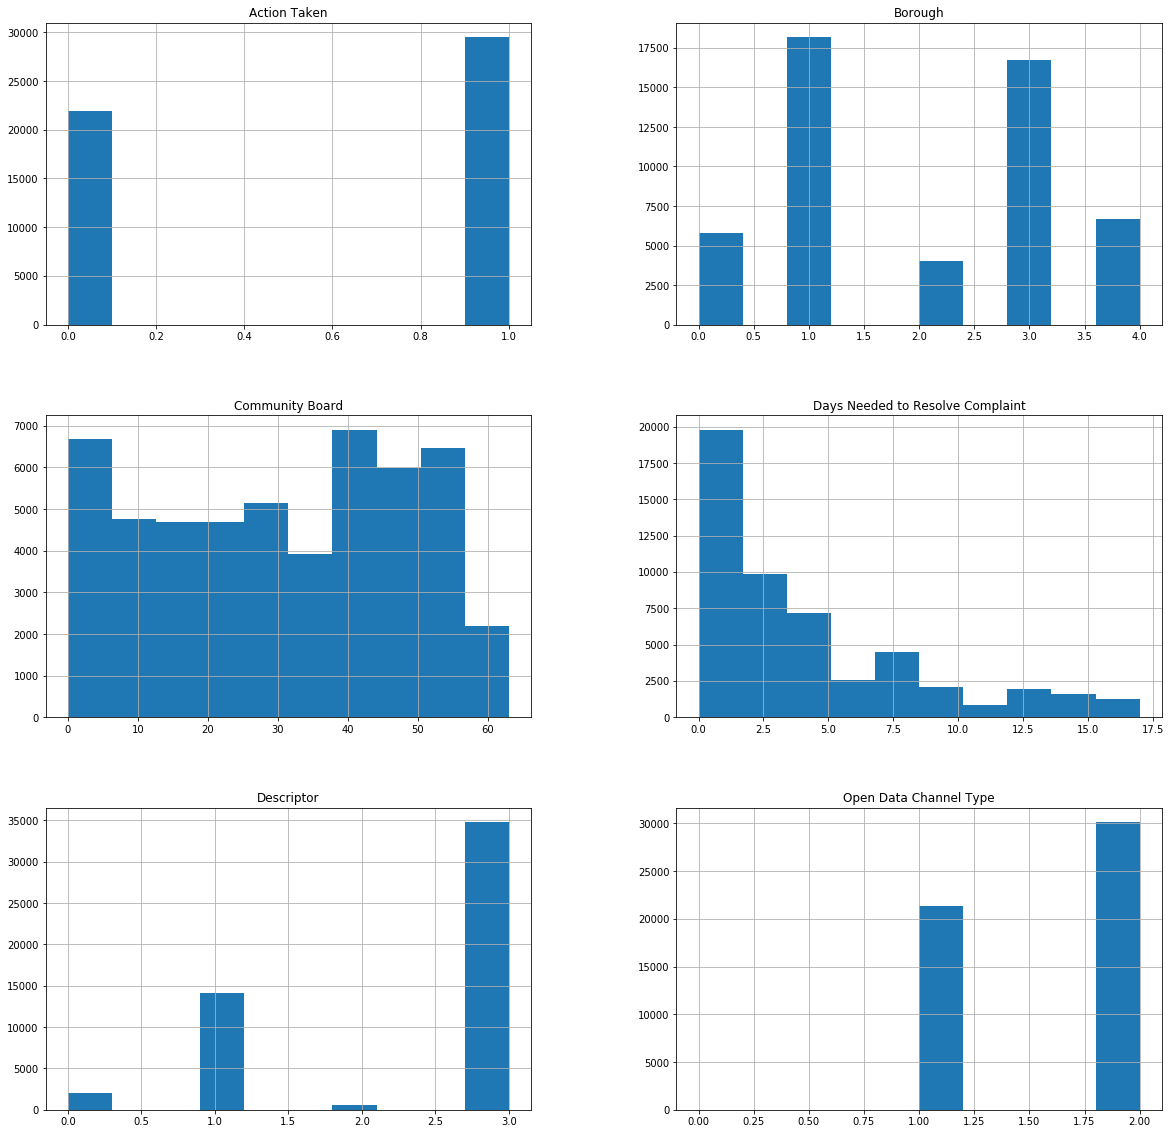

In [136]:
data.hist(figsize = (20,20))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD2A2B9E48>,
      dtype=object)

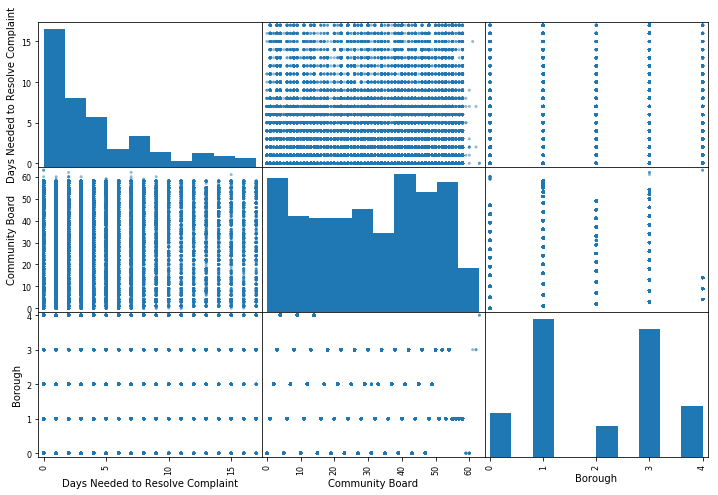

In [137]:
scatter_matrix(data[['Days Needed to Resolve Complaint','Community Board', 'Borough']], figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD29573F98>,
      dtype=object)

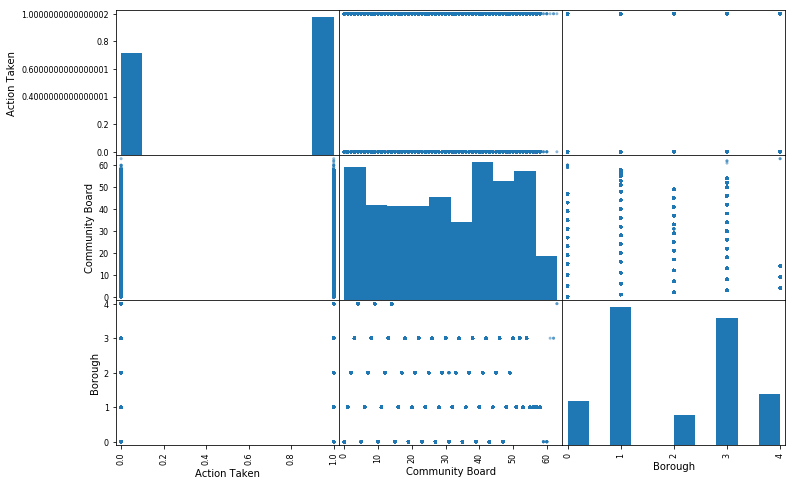

In [138]:
scatter_matrix(data[['Action Taken','Community Board', 'Borough']], figsize = (12,8))

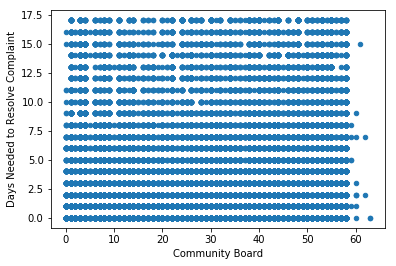

In [139]:
data.plot(kind = "scatter", x = 'Community Board', y= 'Days Needed to Resolve Complaint' )

In [140]:
reasonable =  data[data['Days Needed to Resolve Complaint']<=2]
unreasonable = data[data['Days Needed to Resolve Complaint'] >=3]
print(len(reasonable))
print(len(unreasonable))

24959
26518


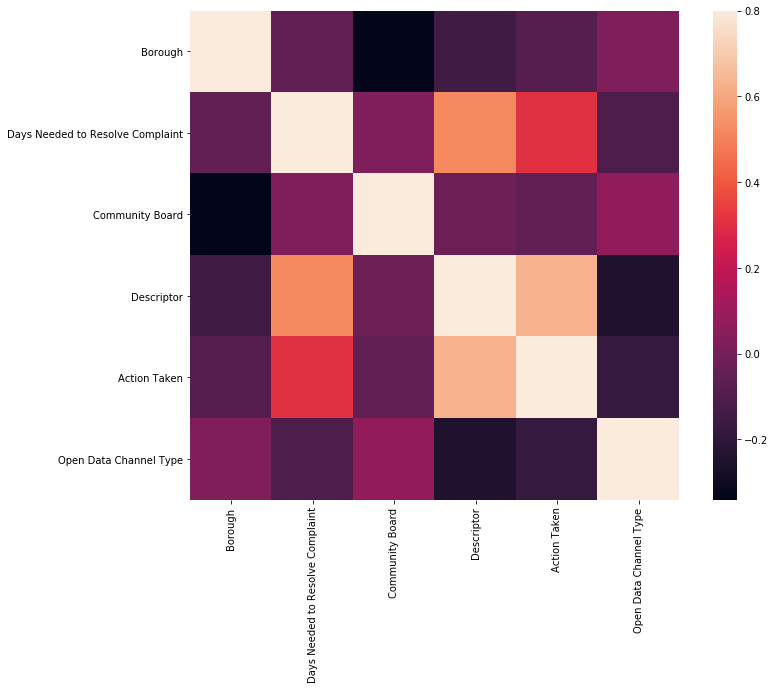

In [141]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [142]:
yy = data['Action Taken']
yy = yy.astype('category')
y = pd.DataFrame(yy, columns = ['Action Taken'])
del data['Action Taken']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(data, y, stratify = y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(38607, 5) (38607, 1)
(12870, 5) (12870, 1)


In [145]:
#nca = NeighborhoodComponentsAnalysis(random_state=42)
#knn = KNeighborsClassifier(n_neighbors=9)
#nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
#nca_pipe.fit(X_train, y_train.values.ravel())
#print(nca_pipe.score(X_test, y_test))

In [146]:
knn = KNeighborsClassifier(n_neighbors=9)
cv_results = cross_val_score(knn, data, yy, cv=5)
knn.fit(X_train,y_train.values.ravel())
print("Model Score: {}".format(knn.score(X_test,y_test.values.ravel())))
print(("5-Fold CV Score: {}".format(cv_results)))
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))


Model Score: 0.8328671328671329
5-Fold CV Score: [0.83585859 0.76641414 0.79757164 0.79883439 0.81486158]
Average 5-Fold CV Score: 0.802708066581306


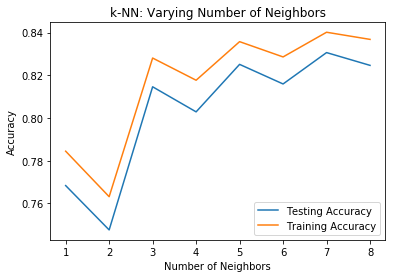

In [147]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train.values.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train.values.ravel())

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test.values.ravel())

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [148]:
data2 = pd.read_csv('snow_311.csv')
data2['pow_2'] = np.power((data2['Days Needed to Resolve Complaint']),2)
data2['pow_3'] = np.power((data2['Days Needed to Resolve Complaint']),3)
print(data2['pow_2'])  
print(data2['pow_3'])  

0          1
1          0
2          1
3          0
4          0
5          0
6          0
7          0
8          1
9          4
10         4
11         1
12         1
13         4
14         1
15         9
16         9
17         9
18         1
19         9
20         1
21         1
22         9
23         9
24        25
25        25
26        25
27        25
28        16
29        16
        ... 
51447      0
51448      0
51449     81
51450     36
51451     49
51452     49
51453     49
51454      0
51455      4
51456    256
51457     16
51458     49
51459    169
51460    289
51461      9
51462    121
51463    169
51464      9
51465     25
51466      4
51467    225
51468      1
51469      9
51470     25
51471      9
51472      0
51473      0
51474      4
51475      9
51476      0
Name: pow_2, Length: 51477, dtype: int64
0           1
1           0
2           1
3           0
4           0
5           0
6           0
7           0
8           1
9           8
10          8
11          

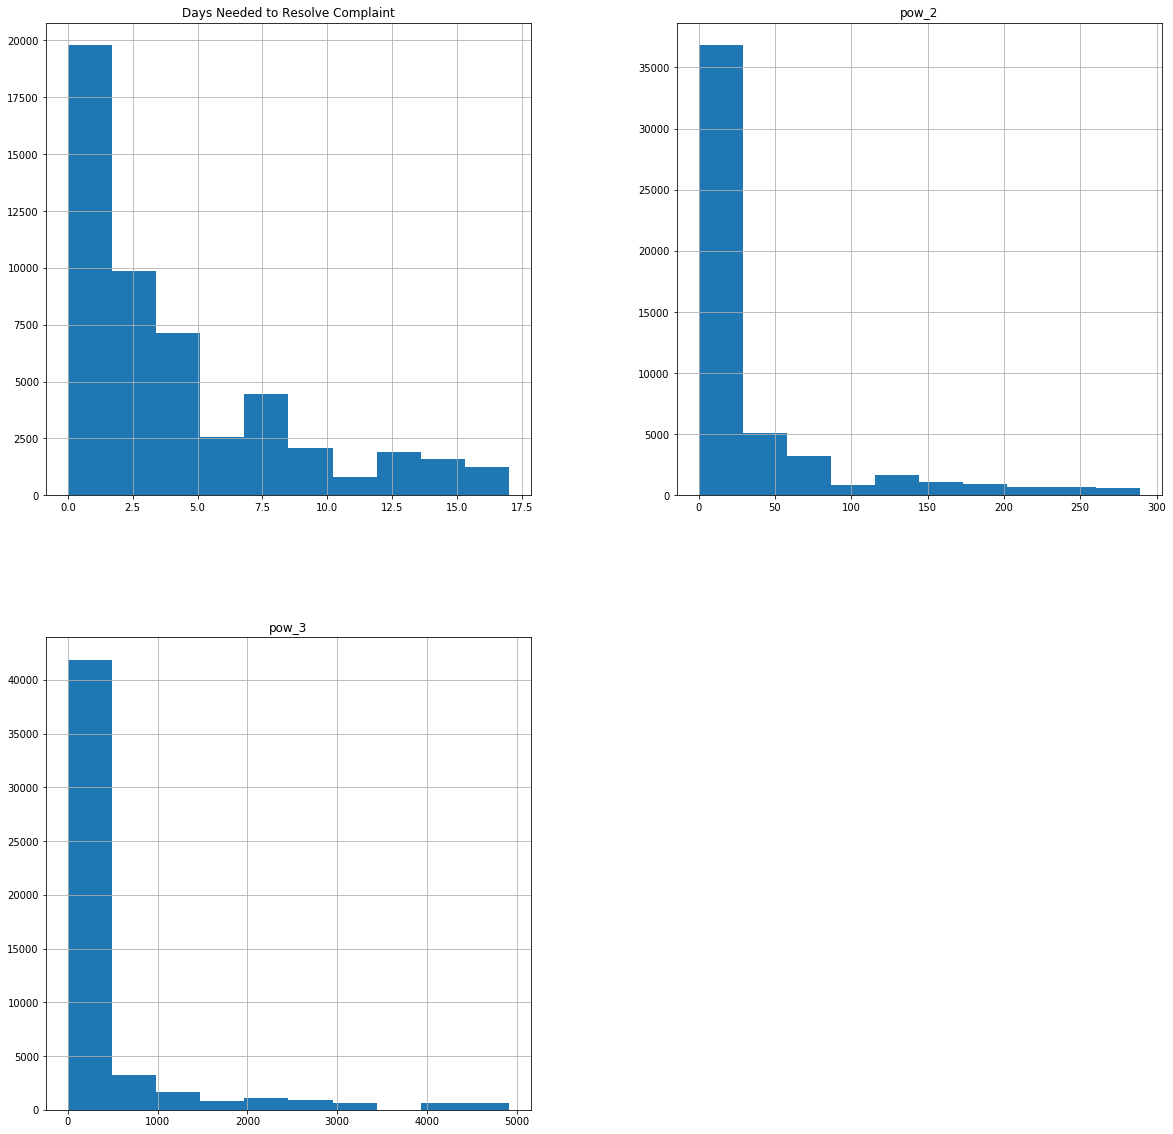

In [149]:
data2.hist(figsize = (20,20))
plt.show()

In [150]:
corrmat["Days Needed to Resolve Complaint"].sort_values(ascending = False)

Days Needed to Resolve Complaint    1.000000
Descriptor                          0.523693
Action Taken                        0.306736
Community Board                     0.028860
Borough                            -0.052249
Open Data Channel Type             -0.105473
Name: Days Needed to Resolve Complaint, dtype: float64

In [151]:
corrmat["Action Taken"].sort_values(ascending = False)

Action Taken                        1.000000
Descriptor                          0.632312
Days Needed to Resolve Complaint    0.306736
Community Board                    -0.054145
Borough                            -0.086627
Open Data Channel Type             -0.179330
Name: Action Taken, dtype: float64

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51477 entries, 0 to 51476
Data columns (total 5 columns):
Borough                             51477 non-null int8
Days Needed to Resolve Complaint    51477 non-null int8
Community Board                     51477 non-null int8
Descriptor                          51477 non-null int8
Open Data Channel Type              51477 non-null int8
dtypes: int8(5)
memory usage: 251.4 KB
